In [905]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [906]:
import re #정규 표현식 모듈
import numpy as np
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.cm as cm
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime      # datatime 라이브러리
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize

%matplotlib inline

data = pd.read_csv('/content/drive/MyDrive/Dataton/netflix_titles.csv')

# Data Review

In [907]:
df = pd.DataFrame(data)
df.drop(['show_id','director','cast'],axis=1,inplace=True)

In [908]:
df.isnull().sum()

type              0
title             0
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

# **Data EDA**

## date_added 시간열 분리

In [909]:
df['date_added'] = df['date_added'].apply(lambda x : pd.Timestamp(x))

df['Registered year'] = df['date_added'].apply(lambda x : x.year)
df['Registered month'] = df['date_added'].apply(lambda x : x.month)
df['Registered day'] = df['date_added'].apply(lambda x : x.day)

df.drop(['date_added'],axis=1,inplace=True)

### description 기준 장르 분류

In [910]:
df['Horror'] = df[df['description'].str.contains('[terror][horrible][blood][ghost]',case=False)].listed_in
df['Romance'] = df[df['description'].str.contains('[love][romantic][happy][sad]',case=False)].listed_in
df['Thriller'] = df[df['description'].str.contains('[mysterious][suspense][kill]',case=False)].listed_in
df['SF'] = df[df['description'].str.contains('[monster]*[myth][space][magic][fantasy]*[dragon][witch]',case=False)].listed_in
df.update(df['Horror'],overwrite=True)
df.update(df['Romance'],overwrite=True)
df.update(df['Thriller'],overwrite=True)
df.update(df['SF'],overwrite=True)
TV_H = df.groupby(['Thriller']).count()
TV_H.iloc[:,[2]]


,country
Thriller,
Action & Adventure,86
"Action & Adventure, Anime Features, Children & Family Movies",3
"Action & Adventure, Anime Features, Classic Movies",1
"Action & Adventure, Anime Features, Horror Movies",1
"Action & Adventure, Anime Features, International Movies",19
...,...
"TV Horror, TV Mysteries, Teen TV Shows",1
"TV Horror, Teen TV Shows",1
"TV Sci-Fi & Fantasy, TV Thrillers",1


## DataFrame split

In [911]:
# TV Show DataFrame 만들기
dataFilter_TV = df['type'] == 'TV Show'
df[dataFilter_TV]

df_TV = df[dataFilter_TV]

# Movie DataFrame 만들기
dataFilter_Movie = df['type'] == 'Movie'
df[dataFilter_Movie]

df_Movie = df[dataFilter_Movie]


## Country null vlaues fill
>TV Show country null vlaues fill

In [912]:
# NaN 채우기
df_TV['country'].fillna("America",inplace =True,limit =79)
df_TV['country'].fillna("Africa",inplace =True,limit =78)
df_TV['country'].fillna("Asia",inplace =True,limit =78)
df_TV['country'].fillna("Europe",inplace =True,limit =78)
df_TV['country'].fillna("Oceania ",inplace =True,limit =78)
# country 결측치 채워졌는지 확인
df_TV['country'].isnull().sum()

0

In [913]:
# 두개 이상의 국가 값 변경
dfTV_strs=df_TV.loc[(df_TV['country'].str.count(','))!=0]

dfTV_strs[0:49]['country'] ='Africa'

dfTV_strs[49:98]['country']='America'

dfTV_strs[98:147]['country']='Asia'

dfTV_strs[147:196]['country']='Europe'

dfTV_strs[196:]['country']='Oceania '

df_TV.update(dfTV_strs,overwrite = True)

> Movie country null vlaues fill


In [914]:
# NaN 채우기
df_Movie['country'].fillna("America",inplace =True,limit =88)
df_Movie['country'].fillna("Africa",inplace =True,limit =88)
df_Movie['country'].fillna("Asia",inplace =True,limit =88)
df_Movie['country'].fillna("Europe",inplace =True,limit =88)
df_Movie['country'].fillna("Oceania ",inplace =True,limit =88)
# country 결측치 채워졌는지 확인
df_Movie['country'].isnull().sum()

0

In [915]:
# 두개 이상의 국가 값 변경
dfMovie_strs=df_Movie.loc[(df_Movie['country'].str.count(','))!=0]

dfMovie_strs[0:215]['country'] ='Africa'

dfMovie_strs[215:430]['country']='America'

dfMovie_strs[430:645]['country']='Asia'

dfMovie_strs[645:860]['country']='Europe'

dfMovie_strs[860:]['country']='Oceania '

df_Movie.update(dfMovie_strs,overwrite = True)

### 나라를 대륙별로 분류하기
> TV Show

In [916]:
df_TV_T = df_TV.groupby(['country']).count()
df_TV_T.iloc[:,[2]]

,release_year
country,
Africa,127
America,128
Argentina,18
Asia,127
Australia,48
Belarus,1
Belgium,8
Brazil,27
Canada,59


In [917]:
def category_continent(x) :
  if x == ('Senegal')or x== ('South Africa')or x== ('Nigeria ')or x== ('Africa') :
    return 0
  elif x == ('Chile')or x== ('Argentina')or x== ('Colombia')or x== ('Brazil')or x== ('Mexico')or x== ('Canada')or x== ('America')or x== ('United States'):
    return 1
  elif x == ('United Arab Emirates')or x== ('Cyprus')or x== ('Philippines')or x== ('Kuwait')or x== ('Jordan')or x== ('Indonesia')or x== ('Saudi Arabia')or x== ('Hong Kong')or x== ('Pakistan')or x== ('Malaysia')or x== ('Lebanon')or x== ('Israel')or x== ('Russia')or x== ('Egypt')or x== ('Singapore')or x== ('Thailand')or x== ('Turkey')or x== ('China')or x== ('India')or x== ('Taiwan')or x== ('Asia')or x== ('South Korea')or x== ('Japan'):
    return 2
  elif x == ('Switzerland')or x== ('Luxembourg')or x== ('Finland')or x== ('Croatia')or x== ('Belarus')or x== ('Ukraine')or x== ('Netherlands')or x== ('Ireland')or x== ('Iceland')or x== ('Norway')or x== ('Poland')or x== ('Belgium')or x== ('Sweden')or x== ('Denmark')or x== ('Italy')or x== ('Germany')or x== ('France')or x== ('Spain')or x== ('Europe')or x== ('United Kingdom'):
    return 3
  else :
    return 4

In [918]:
df_TV['Continent'] = df_TV['country'].apply(category_continent)
df_TV.drop(['country'],axis=1,inplace=True)

> Movie

In [919]:
df_Movie_T = df_Movie.groupby(['country']).count()
df_Movie_T.iloc[:,[2]]

,release_year
country,
Africa,303
America,303
Argentina,38
Asia,303
Australia,39
...,...
Uruguay,3
Venezuela,1
Vietnam,7


In [920]:
df_Movie['Continent'] = df_Movie['country'].apply(category_continent)
df_Movie.drop(['country'],axis=1,inplace=True)

### Rating_band 만들기

> TV Show rating_band
>> * TV-14 : 14세 이상의 청소년들을 위한 프로그램

>> * TV-MA : 17세 이하의 어린이나 청소년들에게 맞지 않는 프로그램

>> * TV-PG : 부모가 정확히 내용을 알고 보여주라는 프로그램

>> * TV-Y : 모든 어린이의 시청이 가능한 프로그램

>> * TV-Y7 : 7세 이상의 어린이들을 대상으로 한 프로그램

>> * TV-G : 모든 연령층이 볼 수 있는 프로그램


In [921]:
df_TV.loc[(df_TV.rating=='TV-14'),'rating'] = 14
df_TV.loc[(df_TV.rating=='TV-MA'),'rating'] = 19
df_TV.loc[(df_TV.rating=='TV-PG'),'rating'] = 0
df_TV.loc[(df_TV.rating=='TV-Y'),'rating'] = 0
df_TV.loc[(df_TV.rating=='TV-Y7'),'rating'] = 0
df_TV.loc[(df_TV.rating=='TV-G'),'rating'] = 0
df_TV.loc[(df_TV.rating=='NR'),'rating'] = 0
df_TV.loc[(df_TV.rating=='TV-Y7-FV'),'rating'] = 0
df_TV.loc[(df_TV.rating=='R'),'rating'] = 0

# TV-PG, TV-Y, TV-Y7, TV-G, NR, TV-Y7-FV, R = 모든 연령을 뜻하는 '0'
# TV-14 = 14세 이상 관람 가능 등급이므로 '14'
# TV-MA = 청소년 관람 불가 등급이므로 '19' 

> Movie rating_band
>> * G : 모든 연령층의 관객들이 볼 수 있는 영화

>> * PG : 어린이 청소년들의 시청여부를 판단해야 하는 영화

>> * PG-13 : 13세 이상의 청소년들이 볼 수 있는 영화

>> * R : 18세 이상의 성인들을 위한 영화

>> * TV-14 : 14세 이상의 청소년들을 위한 영화

>> * TV-G : 모든 연령층이 볼 수 있는 영화

>> * TV-MA : 17세 이하의 어린이나 청소년들에게 맞지 않는 영화

>> * TV-PG : 부모가 정확히 내용을 알고 보여주라는 영화

>> * TV-Y : 모든 어린이의 시청이 가능한 영화

>> * TV-Y7 : 7세 이상의 어린이들을 대상으로 하는 영화

>> * NR : 미성년자 관람이 불가한 영화

>> * NC-17 : 18세 이상의 성인들을 위한 영화(17세 이하의 청소년들은 시청 불가)

>> * TV-Y7-FV : 틴 에이저나 청소년들을 위한 영화

>> * UR : 미성년자 관람이 불가한 영화

In [922]:
df_Movie.loc[(df_Movie.rating=='TV-14'),'rating'] = 14
df_Movie.loc[(df_Movie.rating=='TV-MA'),'rating'] = 19
df_Movie.loc[(df_Movie.rating=='TV-PG'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='TV-Y'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='TV-Y7'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='TV-G'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='NR'),'rating'] = 19
df_Movie.loc[(df_Movie.rating=='TV-Y7-FV'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='R'),'rating'] = 19
df_Movie.loc[(df_Movie.rating=='G'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='PG'),'rating'] = 14
df_Movie.loc[(df_Movie.rating=='PG-13'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='UR'),'rating'] = 19
df_Movie.loc[(df_Movie.rating=='NC-17'),'rating'] = 19
df_Movie.loc[(df_Movie.rating=='66 min'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='74 min'),'rating'] = 0
df_Movie.loc[(df_Movie.rating=='84 min'),'rating'] = 0

# TV-PG, TV-Y, TV-Y7, TV-G, TV-Y7-FV, G, PG-13, 66 min, 74 min, 84 min = 모든연령 등급 ='0'
# TV-14, PG = 14세 이상 관람 가능 등급이므로 '14'
# TV-MA, NR, R, UR, NC-17 = 청소년 관람 불가 등급이므로 '19'

### duration 수치형으로 변환
> TV_Show duration 수치형 변환


In [923]:
# duration 종류 확인
df_TV_T = df_TV.groupby(['duration']).count()
df_TV_T.iloc[:,[2]]

,release_year
duration,
1 Season,1793
10 Seasons,7
11 Seasons,2
12 Seasons,2
13 Seasons,3
15 Seasons,2
17 Seasons,1
2 Seasons,425
3 Seasons,199


In [924]:
def category_duration	(x) :
  if x == "1 Season":
    return 1
  elif x == "2 Seasons" :
    return 2
  elif x == "3 Seasons" :
    return 3
  elif x == "4 Seasons" :
    return 4
  elif x == "5 Seasons" :
    return 5
  elif x == "6 Seasons" :
    return 6 
  elif x == "7 Seasons" :
    return 7
  elif x == "8 Seasons" :
    return 8
  elif x == "9 Seasons" :
    return 9
  elif x == "10 Seasons" :
    return 10
  elif x == "11 Seasons" :
    return 11
  elif x == "12 Seasons" :
    return 12
  elif x == "13 Seasons" :
    return 13
  elif x == "15 Seasons" :
    return 15
  elif x == "17 Seasons" :
    return 17

In [925]:
df_TV['Duration'] = df_TV['duration'].apply(category_duration)
df_TV.drop(['duration'],axis=1,inplace=True)

> Movie duration 수치형 변환

In [926]:
# duration 종류 확인
#df_Movie_T= df_Movie.groupby(['duration']).count()
#df_Movie_T.iloc[:,[2]]

df_Movie['Duration_T']= df_Movie['duration'].str.split(" ",expand=True)[0]
df_Movie.drop(['duration'],axis=1,inplace=True)

# df_Movie 타입 변경 str -> int
df_Movie['Duration_T'] = pd.to_numeric(df_Movie['Duration_T'])

In [927]:
def category_runningtime(x):
  if 0 <= x <60 :
    return 0
  elif 60 <= x <120 :
    return 1
  elif 120 <= x <180 :
    return 2
  elif 180 <= x <240 :
    return 3
  elif 240 <= x <300 :
    return 4
  else :
    return 5

In [928]:
df_Movie['Duration'] = df_Movie['Duration_T'].apply(category_runningtime)
df_Movie.drop(['Duration_T'],axis=1,inplace=True)

In [929]:
df_TV.fillna(0,inplace=True)
df_Movie.fillna(0,inplace=True)

In [930]:
df_TV

,type,title,release_year,rating,listed_in,description,Registered year,Registered month,Registered day,Horror,Romance,Thriller,SF,Continent,Duration
1,TV Show,Blood & Water,2021.0,19,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,24.0,0,0,"International TV Shows, TV Dramas, TV Mysteries",0,0,2
2,TV Show,Ganglands,2021.0,19,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,24.0,0,0,0,0,1,1
3,TV Show,Jailbirds New Orleans,2021.0,19,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,24.0,0,0,0,0,1,1
4,TV Show,Kota Factory,2021.0,19,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,24.0,0,0,0,0,2,2
5,TV Show,Midnight Mass,2021.0,19,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0,9.0,24.0,0,0,"TV Dramas, TV Horror, TV Mysteries",0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,TV Show,Yu-Gi-Oh! Arc-V,2015.0,0,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018.0,5.0,1.0,0,0,"Anime Series, Kids' TV",0,4,2
8796,TV Show,Yunus Emre,2016.0,0,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017.0,1.0,17.0,0,0,"International TV Shows, TV Dramas",0,2,2
8797,TV Show,Zak Storm,2016.0,0,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018.0,9.0,13.0,0,0,Kids' TV,0,4,3
8800,TV Show,Zindagi Gulzar Hai,2012.0,0,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016.0,12.0,15.0,"International TV Shows, Romantic TV Shows, TV ...",0,0,0,2,1


In [931]:
df_Movie

,type,title,release_year,rating,listed_in,description,Registered year,Registered month,Registered day,Horror,Romance,Thriller,SF,Continent,Duration
0,Movie,Dick Johnson Is Dead,2020.0,0,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,25.0,0,0,0,0,1,1
6,Movie,My Little Pony: A New Generation,2021.0,14,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021.0,9.0,24.0,0,0,Children & Family Movies,Children & Family Movies,1,1
7,Movie,Sankofa,1993.0,19,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,0,"Dramas, Independent Movies, International Movies",0,0,0,2
9,Movie,The Starling,2021.0,0,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0,9.0,24.0,0,0,0,0,1,1
12,Movie,Je Suis Karl,2021.0,19,"Dramas, International Movies",After most of her family is murdered in a terr...,2021.0,9.0,23.0,0,0,"Dramas, International Movies",0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,2015.0,19,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016.0,3.0,9.0,0,0,0,0,4,1
8802,Movie,Zodiac,2007.0,19,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0,20.0,0,0,"Cult Movies, Dramas, Thrillers",0,1,2
8804,Movie,Zombieland,2009.0,19,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0,1.0,0,0,0,0,1,1
8805,Movie,Zoom,2006.0,14,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,11.0,0,0,0,0,1,1


# Data Visualization

In [932]:
P = df.groupby(['type']).size().reset_index(name='counts')
pieChart = px.pie(P, values='counts', names='type',
title='Distribution of Content Type on Netflix')
pieChart.show()

* *전체 컨텐츠 중 영화와 TV Show 비율이 2배정도로 영화 비중이 높다*

In [933]:
re_year = df.loc[df['release_year']>2005,['release_year']].astype('int')
as_year = df.loc[df['Registered year']>2005,['Registered year']].astype('int')

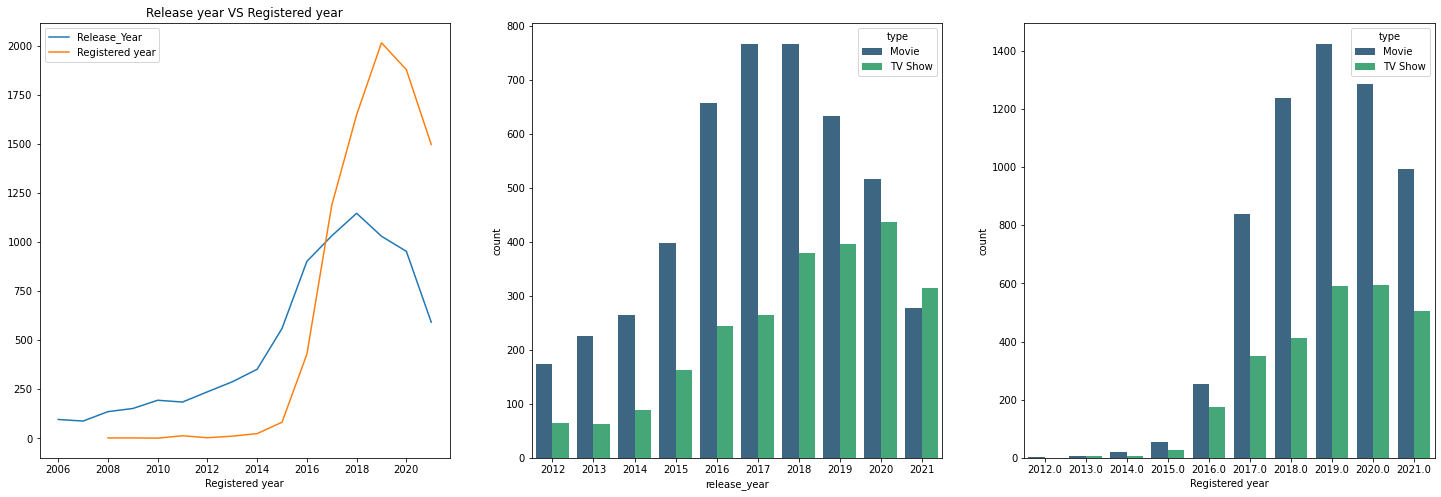

In [934]:
fig,ax = plt.subplots(1,3,figsize = (25,8))

re_year.groupby('release_year')['release_year'].count().plot(kind='line',label = "Release_Year",ax=ax[0]).legend(loc='best')
as_year.groupby('Registered year')['Registered year'].count().plot(kind='line', title='Release year VS Registered year',label='Registered year',ax=ax[0]).legend(loc='best')

last_years = df[["type","release_year"]]
last_years=last_years[last_years["release_year"] >= 2012]
sns.countplot(x="release_year", data=last_years, hue="type", palette="viridis",ax=ax[1])

Register_years = df[["type","Registered year"]]
Register_years=Register_years[Register_years["Registered year"] >= 2012]
sns.countplot(x="Registered year", data=Register_years, hue="type", palette="viridis",ax=ax[2])

* **넷플릭스은 1998년부터 서비스를 시작하였으며, 비디오->DVD->온라인 스트리밍 서비스를 제공하고 있으며 실제 2017년부터 전세계 1억명 이상이 서비스를 이용하고 있다**

위의 라인 그래프를 살펴보면

* 2015년 하반기 이후로 점차 성장하면서 넷플릭스에 등록되는 컨텐츠가 늘어났으며, 이와 비례하게 컨텐츠 런칭도 늘어나는 형태이다
> 컨텐츠 수가 늘어나는 동시에 넷플릭스 온라인 스트리밍 서비스를 통해 많은 컨텐츠를 접할 수 있고 수요가 늘어남에 의해 공급도 함께 늘어나는 선순환의 형태로 넷플릭스가 성장되었을 것으로 추측

* 하지만 2018년도 이후 런칭 컨텐츠, 등록 컨텐츠 둘다 감소하는 형태를 띄고 있다 
> 이는 코로나 팬데믹으로 인한 런칭 컨텐츠 감소로 넷플릭스에 등록되는 컨텐츠의 수도 함께 줄어들었을 수 밖에 없었을 것으로 추측

다음으로 막대 그래프를 살펴보면

* 런칭하는 컨텐츠는 영화의 비중이 TV show에 비해 약 2배이상일 때도 있었지만 2020년대 이후로는 역전되는 형상이 발생
> 위의 라인 그래프와 같이 수요가 늘어남에 따라 런칭되는 컨텐츠의 수도 늘어났을 것으로 판단하기 때문에 시간에 따라 런칭되는 수가 많아졌을 것이고, 2020년대에는 코로나 팬데믹의 본격화로 많은 인원수가 필요한 영화보다 소수의 인원으로 만들 수 있는 TV show의 컨텐츠들이 늘어나 역전되었을 것으로 추측

* 하지만 넷플릭스에 등록되어지는 컨텐츠는 2020대 이후에도 영화 비중이 TV show보다 2배 이상이다
> 새롭고 많은 컨텐츠를 확보하여 성장해야하는 넷플릭스의 입장에서 새롭게 런칭되는 컨텐츠의 수가 많지 않기 때문에 2015년 이전의 컨텐츠들을 확보하고 재방영하는 서비스 제공을 하여 등록되는 컨텐츠의 수가 급격하게 많아졌을 것으로 추측


## TV Show -feature

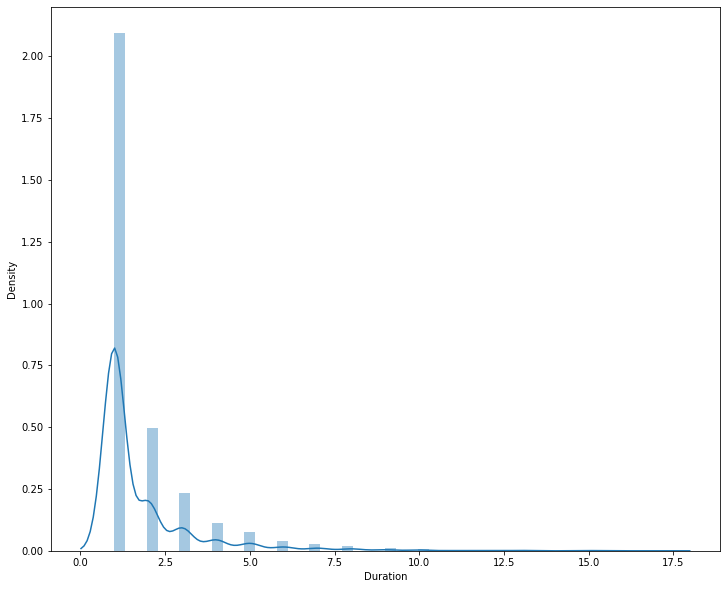

In [935]:
plt.figure(figsize=(12,10))
sns.distplot(df_TV['Duration'])

TV show의 Duration을 살펴보면 대부분 한 시즌으로만 컨텐츠가 제작되어지는 것으로  보여집니다.

#### * Continent vs Rating

In [936]:
df1=df_TV[['rating','Continent']]
df1=df1.rename(columns={"Continent": "Continent"})
df2=df1.groupby(['Continent','rating']).size().reset_index(name='count')
fig3 = px.line(df2, x="Continent", y="count", color='rating',title='Trend of TV_Show rating produced over the continent on Netflix')
fig3.show()

##### 0 = 아프리카 | 1 = 아메리카 |2 = 아시아|3=유럽 |4=오세아니아 

* 아시아를 제외한 아프리카,아메리카,유럽,오세아니아 등의 대륙에서 19세 이상 (청소년 관람 불가)관람이 많은 것으로 보아 4개의 대륙에서는 19세 이상의 자극적인 상업용 컨텐츠가 인기가 있는 것으로 보여진다

* 이에 반해 아시아의 경우 19세 이상 관람보다는 14세 이상의 청소년도 함께 관람할 수 있는 컨텐츠의 수가 많음을 알 수 있는데 이는 아시아만의 독특한 정서와 관련 있지 않을까하고 예상한다 

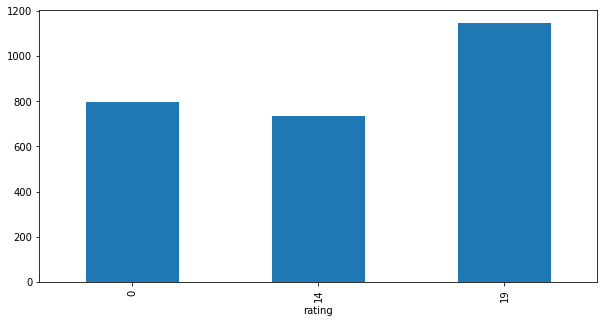

In [937]:
df_TV.groupby('rating')['Continent'].count().plot(kind='bar', figsize=(10,5))
plt.show()

* 19세 이상 관람 티비쇼가 전체 관람이나 14세 이상 관람보다 400개 이상 많다. 이는 넷플리스의 상업성을 보여준다.

#### * Continent vs release_year vs Registered_year

Text(0.5, 1.0, 'Continent vs Registered year')

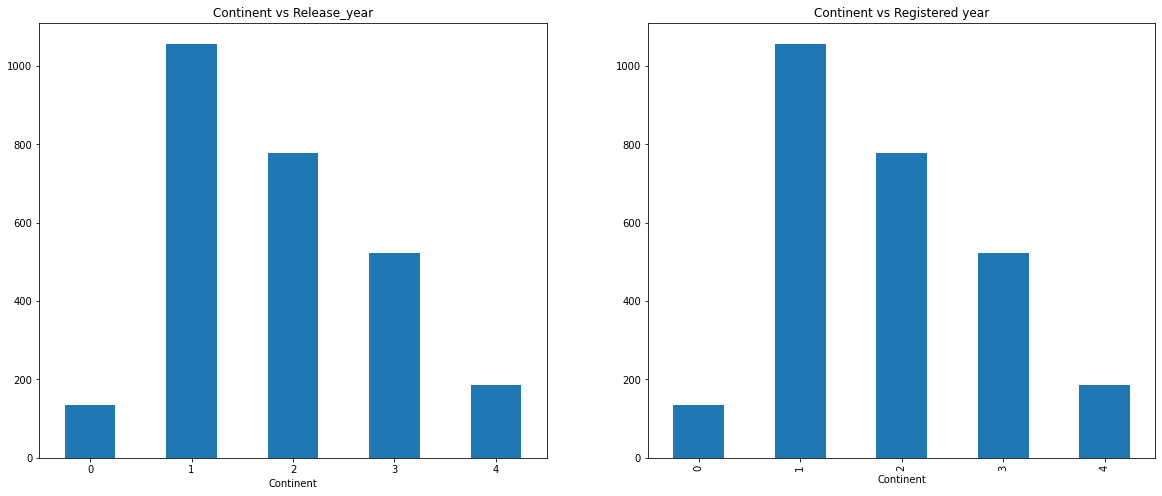

In [938]:
fig,ax = plt.subplots(1,2)

df_TV.groupby(['Continent'])['release_year'].count().plot(kind='bar',rot=0,figsize=(20,8),ax=ax[0])
ax[0].set_title('Continent vs Release_year')
df_TV.groupby('Continent')['Registered year'].count().plot(kind='bar',figsize=(20,8),ax=ax[1])
ax[1].set_title('Continent vs Registered year')

* 아메리카 > 아시아 > 유럽순 으로 런칭되는 컨텐츠의 수가 많은 것으로 보여지며, 넷플릭스에 등록되어지는 컨텐츠도 아메리카 > 아시아 > 유럽 순으로 동일하다 

이는 런칭되는 컨텐츠의 수가 증가할수록 넷플릭스에 등록되어질 수 있는 기회가 많은 것으로 보여진다

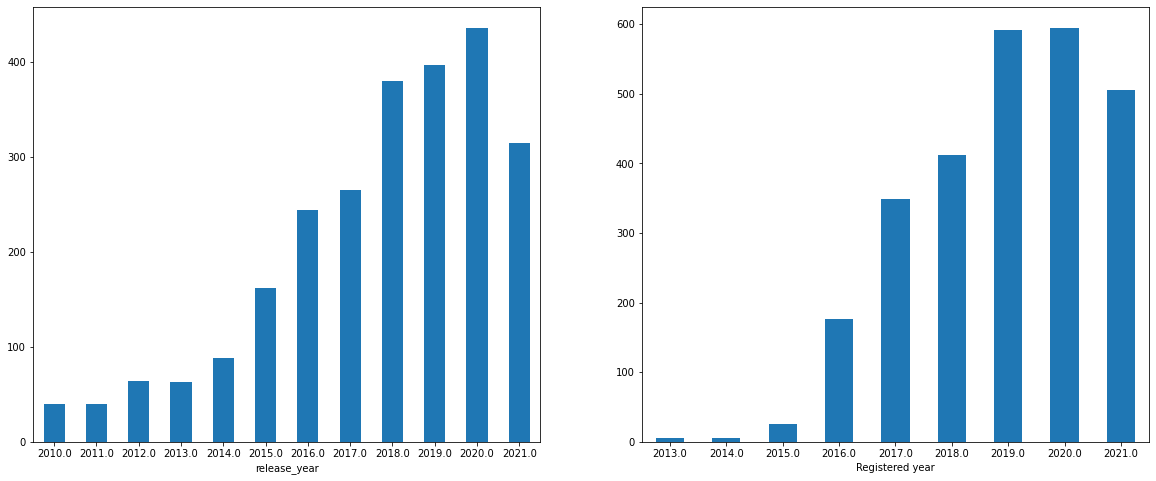

In [939]:
RE_T= df_TV.loc[df_TV['release_year']>=2010]
RA_T= df_TV.loc[df_TV['Registered year']>=2010]

fig,ax = plt.subplots(1,2)
RE_T.groupby('release_year')['Continent'].count().plot(kind='bar',rot=0,figsize=(20,8),ax=ax[0])
RA_T.groupby('Registered year')['Continent'].count().plot(kind='bar',rot=0,figsize=(20,8),ax=ax[1])

#### * Continent vs (Description)enre

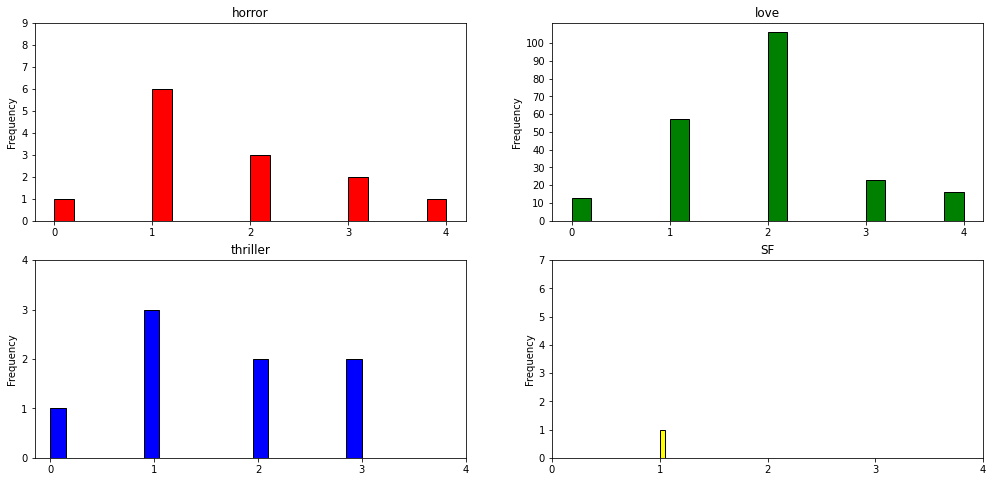

In [940]:
df_TV['description']=np.array(df_TV['description'])
f,ax=plt.subplots(2,2,figsize=(17,8))
df_TV[df_TV['description'].str.contains('horror','evil')].Continent.plot.hist(ax=ax[0][0],bins=20,edgecolor='black',color='red')
ax[0][0].set_title('horror')
x1=list(range(0,5,1))
y1=list(range(0,10,1))
ax[0][0].set_xticks(x1)
ax[0][0].set_yticks(y1)        
df_TV[df_TV['description'].str.contains('love','kiss')].Continent.plot.hist(ax=ax[0][1],color='green',bins=20,edgecolor='black')
ax[0][1].set_title('love')
x2=list(range(0,5,1))
y2=list(range(0,110,10))
ax[0][1].set_xticks(x2)       
ax[0][1].set_yticks(y2)
df_TV[df_TV['description'].str.contains('thriller','suspense')].Continent.plot.hist(ax=ax[1][0],color='blue',bins=20,edgecolor='black')
ax[1][0].set_title('thriller')
x3=list(range(0,5,1))
y3=list(range(0,5,1))
ax[1][0].set_xticks(x3)       
ax[1][0].set_yticks(y3)
df_TV[df_TV['description'].str.contains('SF','space')].Continent.plot.hist(ax=ax[1][1],color='yellow',bins=20,edgecolor='black')
ax[1][1].set_title('SF')
x4=list(range(0,5,1))
y4=list(range(0,8,1))
ax[1][1].set_xticks(x4)       
ax[1][1].set_yticks(y4)
plt.show()

* 호러,스릴러, SF 장르에서는 아메리카 대륙에서 많이 만들어지는 것으로 보여지며 
* 로맨스 장르에서는 아시아 대륙이 크게 강세를 보인다 

이는 아메리카 대륙 중 미국의 영향이 클 것으로 예상하며, 특히 로맨스 장르에서 아시아가 두드러지게 보이는것은 아시아 만의 정서 때문으로 판단한다.



### **Target(Duration) - feature**

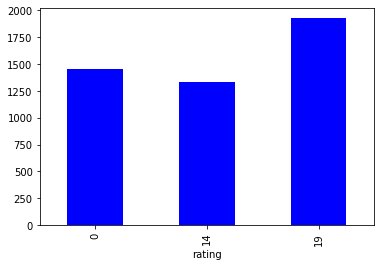

In [941]:
df_TV.groupby('rating')['Duration'].sum().plot.bar(color='blue')
plt.show()

* 흥행하기 위해 상업적인 컨텐츠가 유리하다

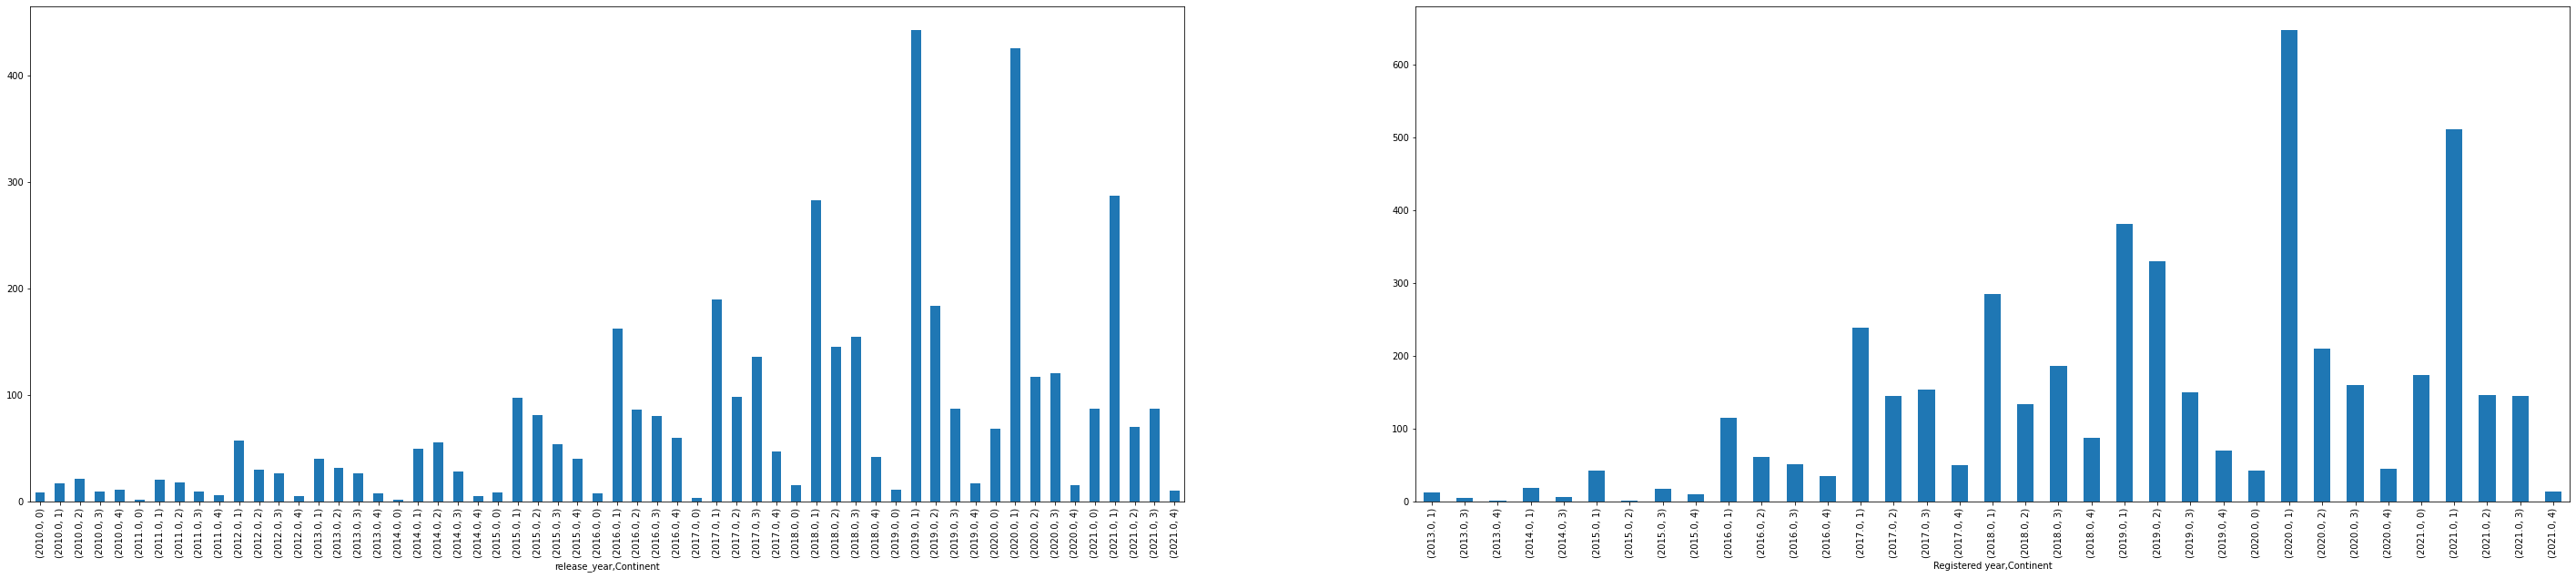

In [942]:
f,ax=plt.subplots(1,2,figsize=(50,10))
RE_T.groupby(['release_year','Continent'])['Duration'].sum().plot.bar(style='sky', ax=ax[0])
RA_T.groupby(['Registered year','Continent'])['Duration'].sum().plot.bar(style='green', ax=ax[1])

* 흥행하기 위해 연도별 컨텐츠 시장의 상승세인지 확인해야하며, 아메리카 대륙에서 런칭하는 것이 유리하다

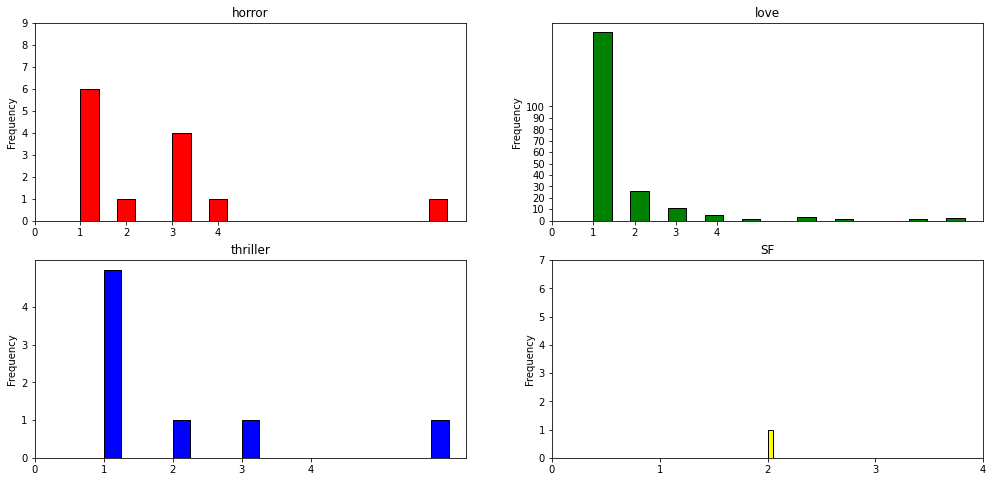

In [943]:
df_TV['description']=np.array(df_TV['description'])
f,ax=plt.subplots(2,2,figsize=(17,8))
df_TV[df_TV['description'].str.contains('horror','evil')].Duration.plot.hist(ax=ax[0][0],bins=20,edgecolor='black',color='red')
ax[0][0].set_title('horror')
x1=list(range(0,5,1))
y1=list(range(0,10,1))
ax[0][0].set_xticks(x1)
ax[0][0].set_yticks(y1)        
df_TV[df_TV['description'].str.contains('love','kiss')].Duration.plot.hist(ax=ax[0][1],color='green',bins=20,edgecolor='black')
ax[0][1].set_title('love')
x2=list(range(0,5,1))
y2=list(range(0,110,10))
ax[0][1].set_xticks(x2)       
ax[0][1].set_yticks(y2)
df_TV[df_TV['description'].str.contains('thriller','suspense')].Duration.plot.hist(ax=ax[1][0],color='blue',bins=20,edgecolor='black')
ax[1][0].set_title('thriller')
x3=list(range(0,5,1))
y3=list(range(0,5,1))
ax[1][0].set_xticks(x3)       
ax[1][0].set_yticks(y3)
df_TV[df_TV['description'].str.contains('SF','space')].Duration.plot.hist(ax=ax[1][1],color='yellow',bins=20,edgecolor='black')
ax[1][1].set_title('SF')
x4=list(range(0,5,1))
y4=list(range(0,8,1))
ax[1][1].set_xticks(x4)       
ax[1][1].set_yticks(y4)
plt.show()

* 흥행하기위해서는 호러물(공포)과 SF 장르를 선택하여 제작하는 것이 유리하다

## Movie -feature

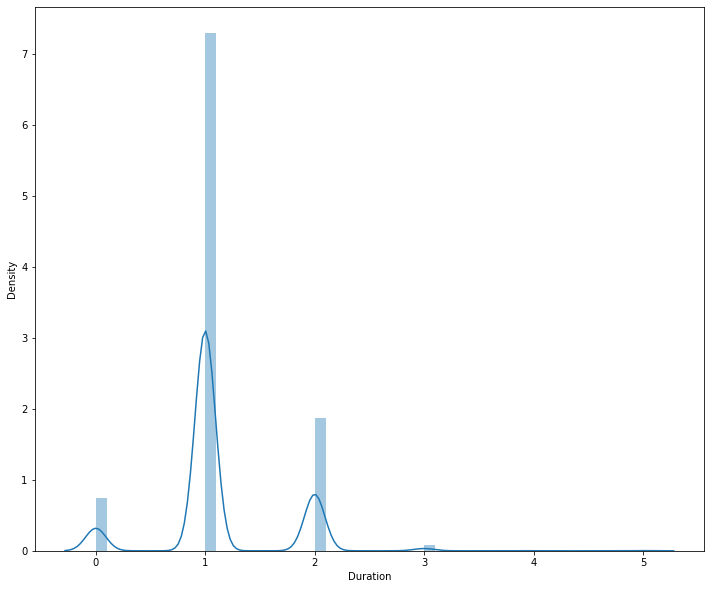

In [944]:
plt.figure(figsize=(12,10))
sns.distplot(df_Movie['Duration'])

영화의 Duration을 살펴보면 대부분 1~2시간 사이의 컨텐츠가  활발히 제작되어지는 것으로 보여집니다.

#### * Continent vs Rating

In [945]:
df3=df_Movie[['rating','Continent']]
df3=df3.rename(columns={"Continent": "Continent"})
df4=df3.groupby(['Continent','rating']).size().reset_index(name='count')
fig5 = px.line(df4, x="Continent", y="count", color='rating',title='Trend of Movie rating produced over the Continent on Netflix')
fig5.show()

위의 TV show와 같이 19세 이상 관람 등급의 상업용 영화가 많습니다.

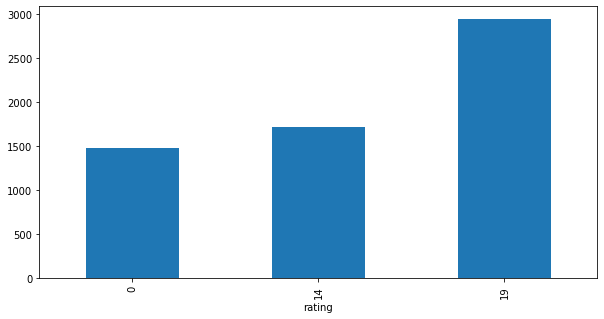

In [946]:
df_Movie.groupby('rating')['Continent'].count().plot(kind='bar', figsize=(10,5))
plt.show()

#### * Continent vs release_year vs Registered_year

Text(0.5, 1.0, 'Continent vs Registered year')

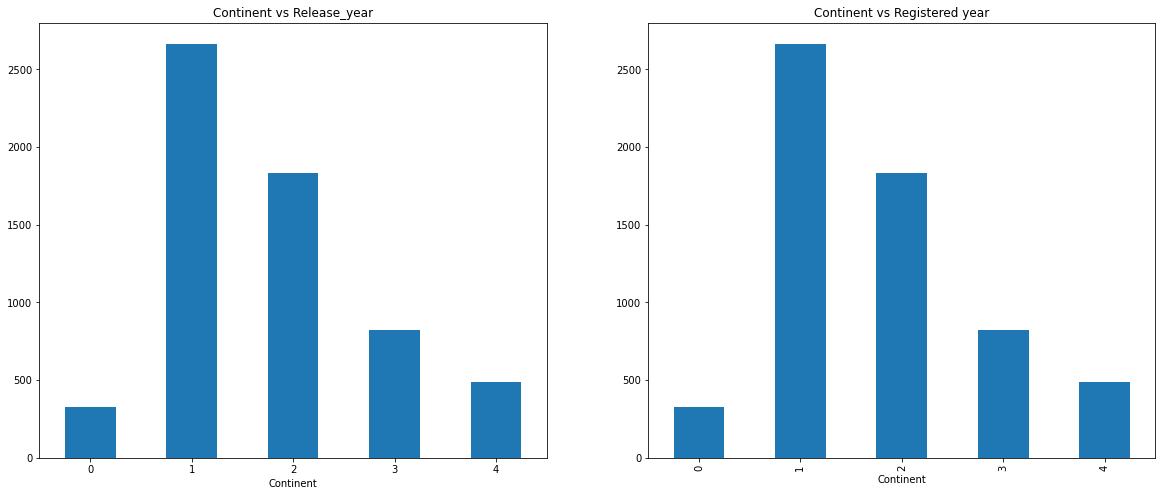

In [947]:
fig,ax = plt.subplots(1,2)

df_Movie.groupby(['Continent'])['release_year'].count().plot(kind='bar',rot=0,figsize=(20,8),ax=ax[0])
ax[0].set_title('Continent vs Release_year')
df_Movie.groupby('Continent')['Registered year'].count().plot(kind='bar',figsize=(20,8),ax=ax[1])
ax[1].set_title('Continent vs Registered year')


위의 TV show와 똑같이 런칭되는 영화의 수가 증가할수록 넷플릭스에 등록되어질 수 있는 기회가 많은 것으로 보여진다

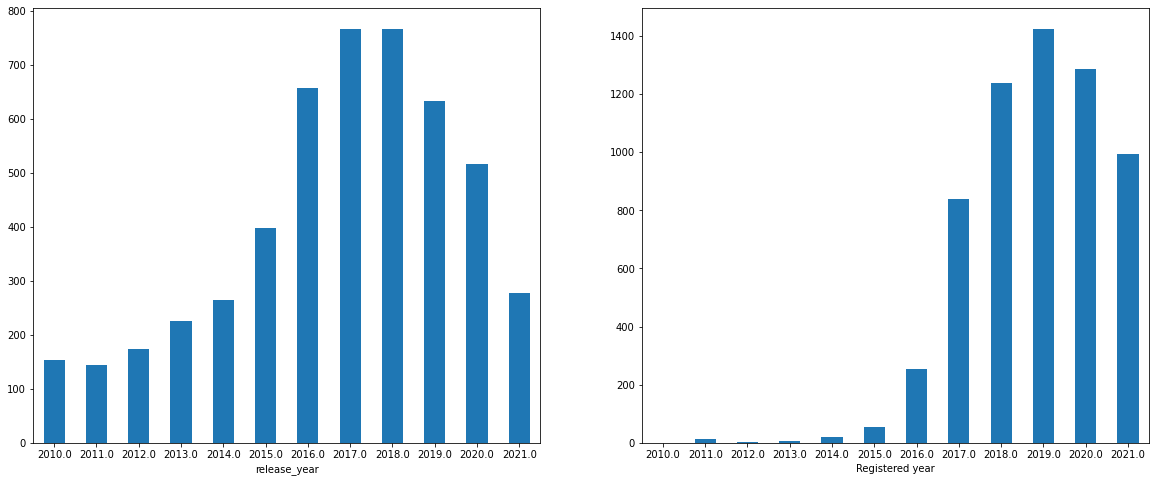

In [948]:
RE_M= df_Movie.loc[df_Movie['release_year']>=2010]
RA_M= df_Movie.loc[df_Movie['Registered year']>=2010]

fig,ax = plt.subplots(1,2)
RE_M.groupby('release_year')['Continent'].count().plot(kind='bar',rot=0,figsize=(20,8),ax=ax[0])
RA_M.groupby('Registered year')['Continent'].count().plot(kind='bar',rot=0,figsize=(20,8),ax=ax[1])

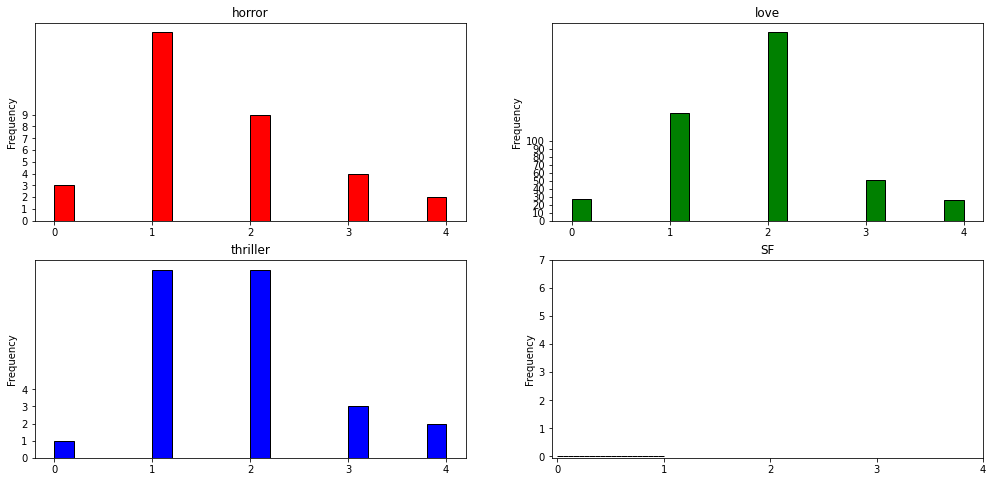

In [949]:
df_Movie['description']=np.array(df_Movie['description'])
f,ax=plt.subplots(2,2,figsize=(17,8))
df_Movie[df_Movie['description'].str.contains('horror','evil')].Continent.plot.hist(ax=ax[0][0],bins=20,edgecolor='black',color='red')
ax[0][0].set_title('horror')
x1=list(range(0,5,1))
y1=list(range(0,10,1))
ax[0][0].set_xticks(x1)
ax[0][0].set_yticks(y1)        
df_Movie[df_Movie['description'].str.contains('love','kiss')].Continent.plot.hist(ax=ax[0][1],color='green',bins=20,edgecolor='black')
ax[0][1].set_title('love')
x2=list(range(0,5,1))
y2=list(range(0,110,10))
ax[0][1].set_xticks(x2)       
ax[0][1].set_yticks(y2)
df_Movie[df_Movie['description'].str.contains('thriller','suspense')].Continent.plot.hist(ax=ax[1][0],color='blue',bins=20,edgecolor='black')
ax[1][0].set_title('thriller')
x3=list(range(0,5,1))
y3=list(range(0,5,1))
ax[1][0].set_xticks(x3)       
ax[1][0].set_yticks(y3)
df_Movie[df_Movie['description'].str.contains('SF','space')].Continent.plot.hist(ax=ax[1][1],color='yellow',bins=20,edgecolor='black')
ax[1][1].set_title('SF')
x4=list(range(0,5,1))
y4=list(range(0,8,1))
ax[1][1].set_xticks(x4)       
ax[1][1].set_yticks(y4)
plt.show()

* 호러, 로맨스 장르 그래프 형태는 위의 TV show와 같지만, 스릴러 장르에서는 아메리카, 아시아가 동일한 빈도로 영화 제작하는 것을 볼 수 있습니다.
* 또한, TV show와 다르게 영화에서는 SF 장르를 제작하는 대륙을 볼 수 없는데, 현재 추측하는 바는 데이터 전처리 과정 중 장르를 나누는 조건 문자열의 조합을 수정한다면 필요한 정보를 얻을 수 있을 것이라 예상됩니다.

### **Target(Duration) - feature**

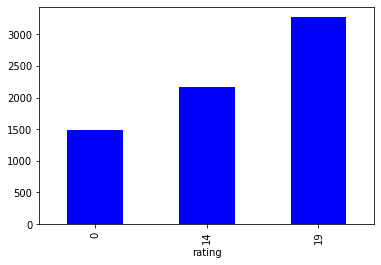

In [950]:
df_Movie.groupby('rating')['Duration'].sum().plot.bar(color='blue')
plt.show()

* 흥행하기 위해 상업적인 컨텐츠가 유리하다

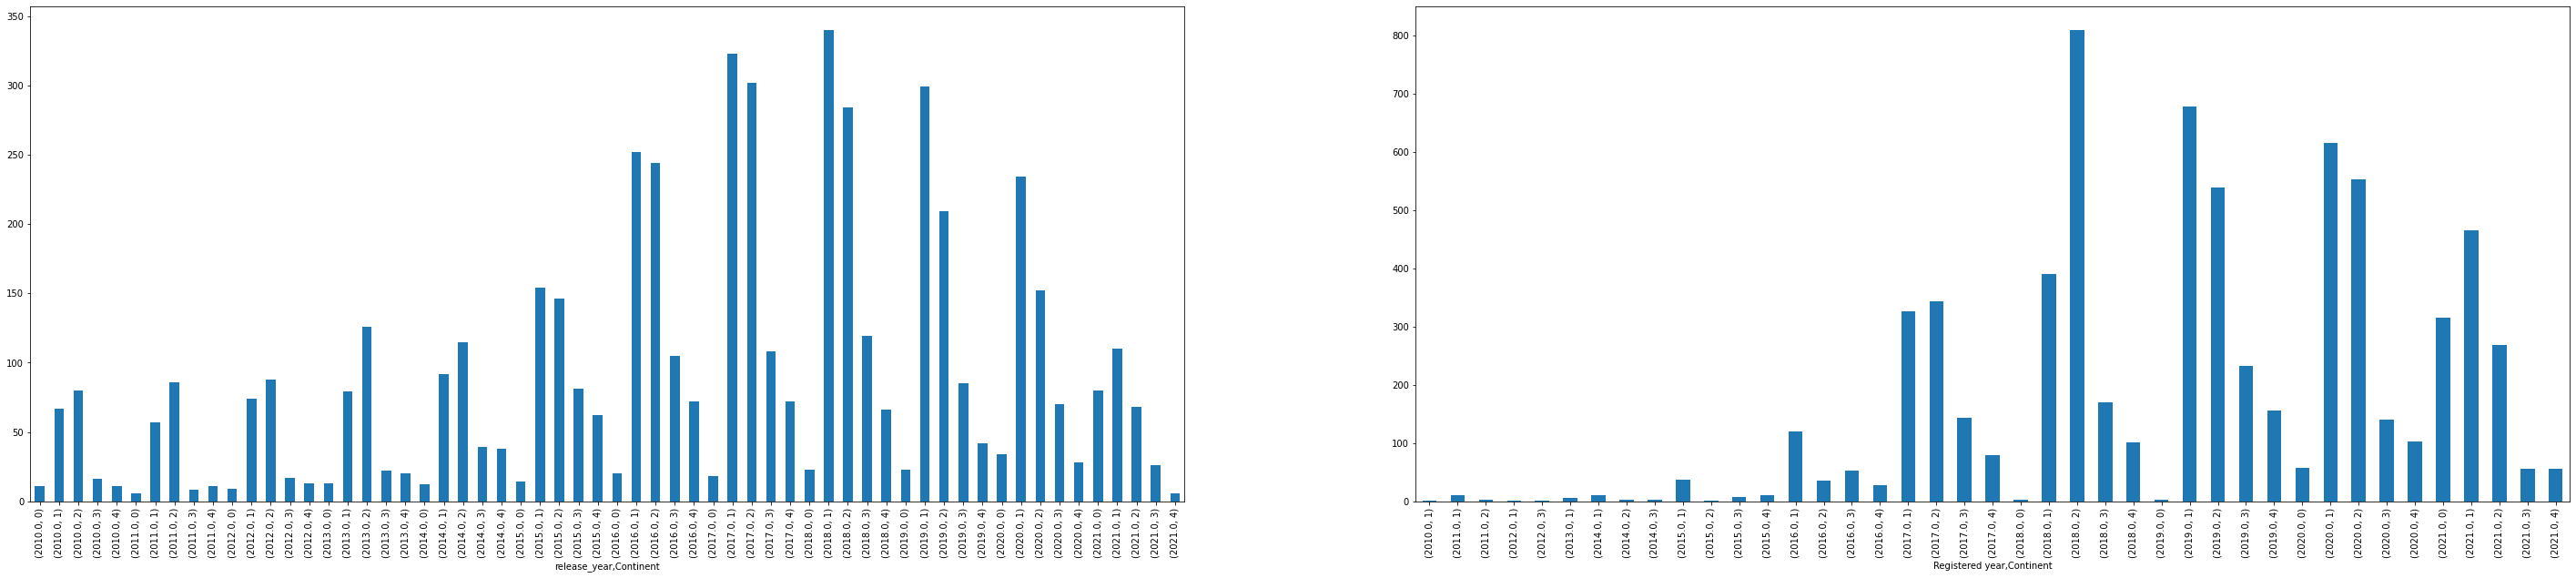

In [951]:
f,ax=plt.subplots(1,2,figsize=(50,10))
RE_M.groupby(['release_year','Continent'])['Duration'].sum().plot.bar(style='sky', ax=ax[0])
RA_M.groupby(['Registered year','Continent'])['Duration'].sum().plot.bar(style='green', ax=ax[1])

* 흥행하기 위해 연도별 영화 시장의 상승세인지 확인해야하며, 아메리카 대륙에서 런칭하는 것이 유리하다
* 하지만, 2021년도에는 아시아에서도 활발하게 영화사업이 발전하고 유명해지고 있는 추세로 아시아 대륙에서 런칭하는 것도 고려하는 것도 좋을 것으로 예측한다.

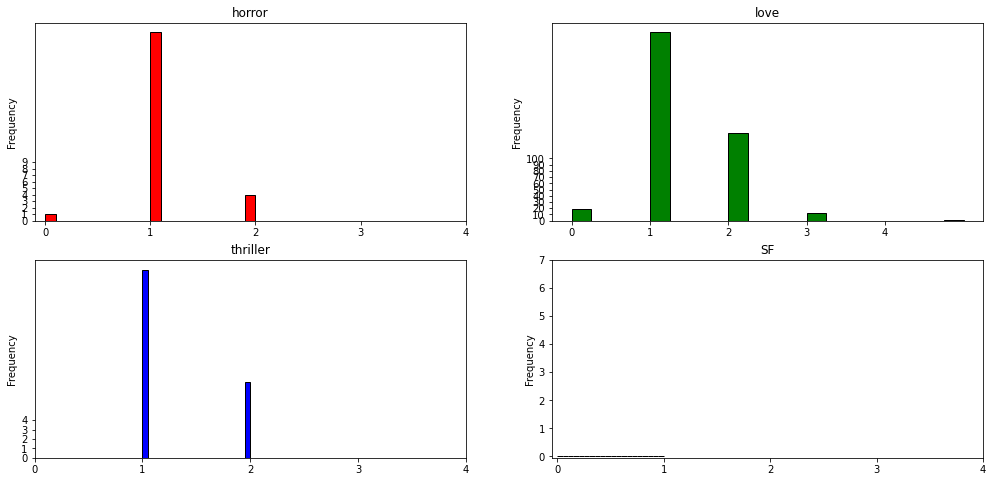

In [953]:
df_Movie['description']=np.array(df_Movie['description'])
f,ax=plt.subplots(2,2,figsize=(17,8))
df_Movie[df_Movie['description'].str.contains('horror','evil')].Duration.plot.hist(ax=ax[0][0],bins=20,edgecolor='black',color='red')
ax[0][0].set_title('horror')
x1=list(range(0,5,1))
y1=list(range(0,10,1))
ax[0][0].set_xticks(x1)
ax[0][0].set_yticks(y1)        
df_Movie[df_Movie['description'].str.contains('love','kiss')].Duration.plot.hist(ax=ax[0][1],color='green',bins=20,edgecolor='black')
ax[0][1].set_title('love')
x2=list(range(0,5,1))
y2=list(range(0,110,10))
ax[0][1].set_xticks(x2)       
ax[0][1].set_yticks(y2)
df_Movie[df_Movie['description'].str.contains('thriller','suspense')].Duration.plot.hist(ax=ax[1][0],color='blue',bins=20,edgecolor='black')
ax[1][0].set_title('thriller')
x3=list(range(0,5,1))
y3=list(range(0,5,1))
ax[1][0].set_xticks(x3)       
ax[1][0].set_yticks(y3)
df_Movie[df_Movie['description'].str.contains('SF','space')].Duration.plot.hist(ax=ax[1][1],color='yellow',bins=20,edgecolor='black')
ax[1][1].set_title('SF')
x4=list(range(0,5,1))
y4=list(range(0,8,1))
ax[1][1].set_xticks(x4)       
ax[1][1].set_yticks(y4)
plt.show()

* 영화로 흥행하기 위해 1~2시간의 러닝타임을 초과하지 않도록 하는 것이 유리하다

## 결론

* 넷플릭스에는 흥행하기 위한 요소
> 1. 자극적인 요소가 포함된 상업용 컨텐츠 (청소년 관람 불가)
> 2. 컨텐츠 시장의 추이 확인 및 활발히 제작되어 지고 있는 아메리카, 아시아 등의 대륙을 선택
> 3. 공포, SF 등의 시즌(시리즈) 및 2시간 미만의 러닝타임의 컨텐츠
